<a href="https://colab.research.google.com/github/mahasvinreddy07/ML_Lab/blob/main/Lab-4-AP23110010075(breast_cancer_prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
#import libraries
import pandas as pd
import seaborn as sns

# Download dataset from Kaggle

In [ ]:
#set kaggle API credentials
import os
os.environ['KAGGLE_USERNAME'] = 'mahasvinreddykayam'
os.environ['KAGGLE_KEY'] = '7a5c0af0c19d166d7148cb04351a11d2'

In [ ]:
#download dataset
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 129MB/s]


In [ ]:
#unzip file
! unzip breast-cancer-wisconsin-data.zip

Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


# Load & Explore Data

In [ ]:
#load data on dataframe
df1 = pd.read_csv('data.csv')

In [ ]:
#display dataframe
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#count of rows and columns
df1.shape

(569, 33)

In [ ]:
#count number of null(empty) values
df1.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
# Drop the column with null values
df1.dropna(axis=1,inplace=True)

In [ ]:
# count of rows and columns
df1.shape

(569, 32)

In [ ]:
#Get count of number of M or B cells in diagnosis
df1['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


# Label Encoding

In [ ]:
#Get Datatypes of each column in our dataset
df1.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [ ]:
#Encode the diagnosis values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df1.iloc[:,1]=labelencoder.fit_transform(df1.iloc[:,1].values)


In [ ]:
#display df
df1

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Split Dataset & Feature Scaling

In [ ]:
from re import X
#Splitting the dataset into independent and dependent datasets
X = df1.drop(['id', 'diagnosis'], axis=1)
Y = df1['diagnosis'].values

In [ ]:
#Splitting datasets into training(75%) and testing(25%)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [ ]:
#Scaling the data(feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
#print da
print(X_train)

[[-8.12005522e-01]
 [-4.66126910e-01]
 [-1.15500181e+00]
 [ 5.02333202e-01]
 [-5.69890494e-01]
 [-2.29776526e-01]
 [ 1.24749051e-01]
 [-6.30419251e-01]
 [-6.04478355e-01]
 [-7.25535869e-01]
 [-4.20009762e-01]
 [-1.37463473e+00]
 [ 1.65814423e+00]
 [ 3.55334792e-01]
 [ 2.66119220e+00]
 [ 2.29801966e+00]
 [ 3.79970930e+00]
 [-6.18889964e-01]
 [-1.24118323e+00]
 [ 2.03284606e+00]
 [-6.93830330e-01]
 [ 6.71026158e-02]
 [-1.45188095e+00]
 [-6.62124790e-01]
 [ 2.37159600e-01]
 [ 7.79036091e-01]
 [-8.63887314e-01]
 [ 1.62932101e+00]
 [-6.90948008e-01]
 [-1.60600803e-01]
 [ 6.43566968e-01]
 [-1.00072046e-01]
 [-2.12482595e-01]
 [ 5.22509454e-01]
 [-8.86945888e-01]
 [-1.23801268e+00]
 [-5.35302633e-01]
 [ 1.43044081e+00]
 [ 1.20561971e+00]
 [ 2.18272679e+00]
 [-2.18247239e-01]
 [-9.33063036e-01]
 [ 5.74391246e-01]
 [-1.56803852e+00]
 [-7.39947478e-01]
 [-2.21129560e-01]
 [-4.05598153e-01]
 [ 1.74461388e+00]
 [-1.56775029e+00]
 [ 1.07455120e-01]
 [ 1.85414211e+00]
 [-1.31785299e+00]
 [ 6.3492000

# Build a Logistic Regression Model

In [ ]:
#build a logistic regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train.astype(int))

LogisticRegression(random_state=0)

In [ ]:
#make use of trained model to make predictions on test data
Y_pred = classifier.predict(X_test)

# Performance Evaluation

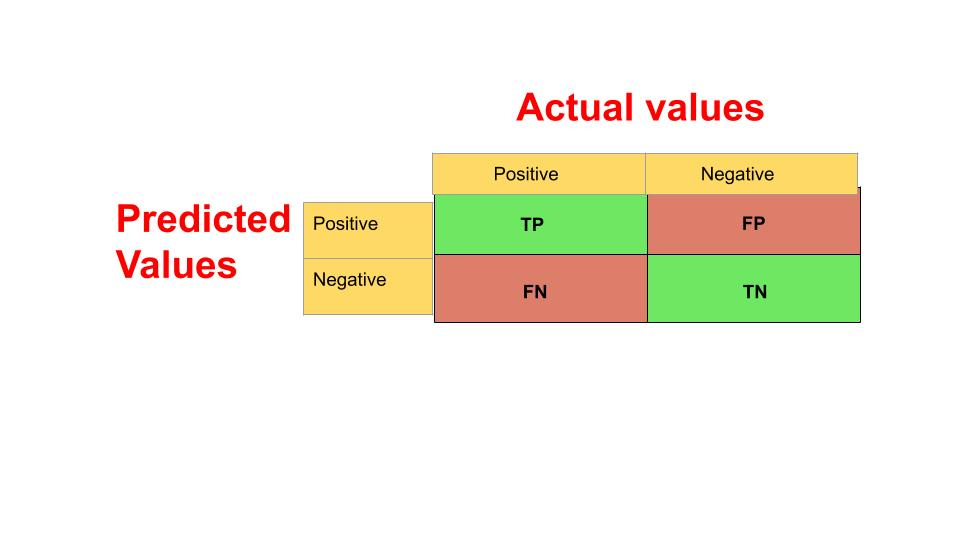

<Axes: >

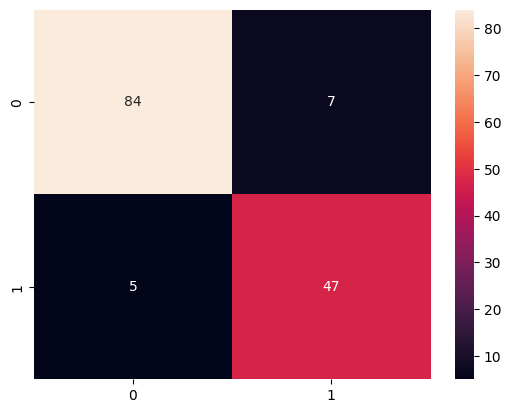

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.astype(int), Y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
#get accuracy score for model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test.astype(int), Y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


In [ ]:
print(Y_test.astype(int))

[1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1
 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1]


In [ ]:
print(Y_pred)

[1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1
 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1]


# Build a Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import os

# Download the dataset
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

# Unzip the dataset
!unzip -o breast-cancer-wisconsin-data.zip

# Load data
df1 = pd.read_csv('data.csv')
df1.dropna(axis=1, inplace=True)

# Label Encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df1.iloc[:,1]=labelencoder.fit_transform(df1.iloc[:,1].values)


# Splitting the dataset into independent and dependent datasets
X = df1.drop(['id', 'diagnosis'], axis=1)
Y = df1['diagnosis'].values

# Splitting datasets into training(75%) and testing(25%)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

# Scaling the data(feature scaling)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Initialize and train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_linear = linear_reg.predict(X_test)

# Calculate the R2 score
r2 = r2_score(Y_test, Y_pred_linear)

print(f'R2 Score: {r2:.2f}')

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open breast-cancer-wisconsin-data.zip, breast-cancer-wisconsin-data.zip.zip or breast-cancer-wisconsin-data.zip.ZIP.


FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

**Note:** Linear Regression is typically used for continuous target variables. Since the 'diagnosis' variable is categorical (0 or 1), Logistic Regression is generally a more appropriate model for this type of classification problem.